# Big Data - Pokemon Lab
This lab project covers the material from Lectures 1-3. Please make yourself familiar with the lecture content before proceeding. We will be using the [**Pokemon with stats**](https://www.kaggle.com/abcsds/pokemon) dataset courtesy of Alberto Barradas on Kaggle.

**<u>How to complete</u>**:
- For each exercise, read the objective and hint, and then fill the cells containing **TODO**. These will usually be code cells requiring you to write Python code. If we ask you to explain something in plaintext, these may also be Markdown cells.
- Do not modify any cells except for the ones containing **TODO**.
- Do not add or delete any cells from the notebook. If you add any cells during your work, please remove them before submitting.
- Allowed libraries are imported below. No additional libraries may be used for this lab project.
- **Run all cells before submitting. You will only get marks for code that has been run, and has not produced any errors.**

In [22]:
# Import statement

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1: Dataset Import and Exploration

In [4]:
# Use pd.read_csv to read from pokemon csv file and return a dataframe

df_pokemon = pd.read_csv('pokemon.csv')

In [7]:
# 1. Use df.shape function produces a tuple consists of (row number, column number)
# 2. Then use [0] or [1] to extract positioned value from the tuple
# 3. Use df.head(4) to view top 4 lines

print(f'There are {df_pokemon.shape[0]} rows and {df_pokemon.shape[1]} columns (exclude Index) in the dataframe. \nThe top 4 rows are:')
df_pokemon.head(4)

There are 800 rows and 13 columns (exclude Index) in the dataframe. 
The top 4 rows are:


,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,NotLegendary
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,NotLegendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,NotLegendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,NotLegendary


In [8]:
# 1. Use df.isna/isnull() + any() to return boolean results, any number larger than 0 will return True, means there is null value.
# 2. Then use dropna() to delete rows with null values
# 3. Repeat shape[0] to return the remaining total row number

print(df_pokemon.isna().any())
df_pokemon_co = df_pokemon.dropna()
print(f'\nThere are {df_pokemon_co.shape[0]} rows left in the cleaned dataframe.')


#             False
Name          False
Type1         False
Type2          True
Total         False
HP            False
Attack        False
Defense       False
SpAtk         False
SpDef         False
Speed         False
Generation    False
Legendary     False
dtype: bool

There are 414 rows left in the cleaned dataframe.


##  2: Basic Statistics

In [13]:
# 1.Extract relevant columns based on the given condition
df_legendary = df_pokemon_co[df_pokemon_co['Legendary'] == 'Legendary']
df_notlegendary = df_pokemon_co[df_pokemon_co['Legendary'] == 'NotLegendary']

# 2.Use df.mean() to return the average value
LegendaryMean = round(df_legendary['HP'].mean(),2)
NotLegendaryMean = round(df_notlegendary['HP'].mean(),2)

# 3.Use round( ,2) function to round up the differences between these values
MeanDifference = round((LegendaryMean - NotLegendaryMean),2)

# 4.Print the message
print(f'The average HP for Legendaries is {LegendaryMean}, where as the average HP for non-legendaries is {NotLegendaryMean},\n\nThe legendary HP is {MeanDifference} higher than Non-legendaries on average.')

The average HP for Legendaries is 96.42, where as the average HP for non-legendaries is 67.89,

The legendary HP is 28.53 higher than Non-legendaries on average.


In [14]:
# 1.Use df.var and df.std to calculate using extracted series of Attack for all Generation 1 rows
AttackSeries = df_pokemon_co[df_pokemon_co['Generation'] == 1]['Attack']
AttackVariance = round(AttackSeries.var(),2)
AttackStd = round(AttackSeries.std(),2)

# 2.Print an explaination of the rounded results
print(f'The variance of Attack data for pokemon Generation 1 is {AttackVariance}, the standard deviation is {AttackStd}.')

The variance of Attack data for pokemon Generation 1 is 1038.14, the standard deviation is 32.22.


In [15]:
# Use sem() to calculate the standard error for the same variable
AttackStdError = round(AttackSeries.sem(),2)
print(f'The standard error for the variable is {AttackStdError}.')

The standard error for the variable is 3.65.


     Difference between Standard Error of the Mean (SEM) and Standard Deviation (SD)
Under conditions where central limit theorem applies, SEM represents the SD of sample means from *n* samples taken from the a population. When sample number *n* is sufficiently large, the theorem states that the mean of the the sample means is the population mean, and the SD of sample means (SEM) equals to the SD of population divided by the squared root of the sample size *n*. Therefore, the SD of population will always be larger than SEM of the samples unless the sample size *n* is 1. When the population SD is unknown, it is possible to produce *z* scores based on sampling information, or vice versa. 


##  3: Visualisation 

"\nAlternatively, can use:\n\ndf2.plot.box()\nplt.title('Type 1 & Total Numbers')\n"

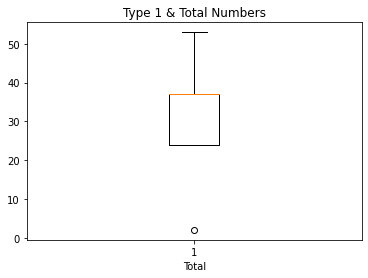

In [23]:
# 1.Filter out the conditioned rows into a new dataframe
df_pokemon_co1 = df_pokemon_co[
                                (df_pokemon_co['Type1'] == 'Grass')
                                | (df_pokemon_co['Type1'] == 'Fire')
                                | (df_pokemon_co['Type1'] == 'Normal')
                                | (df_pokemon_co['Type1'] == 'Water')
                                | (df_pokemon_co['Type1'] == 'Flying')
                                ]
# 2.Group the rows by Type1 values and count the total entries
df2 = pd.DataFrame(df_pokemon_co1.groupby('Type1').size(), columns= ['Total'])

# 3.Plot the dataframe using matplotlib boxplot
plt.boxplot(df2)
plt.title('Type 1 & Total Numbers')
plt.xlabel('Total')

"""
Alternatively, can use:

df2.plot.box()
plt.title('Type 1 & Total Numbers')
"""

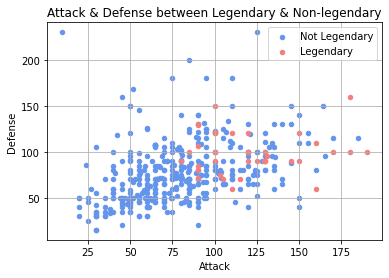

In [28]:
# 1. Use matplotlib to create scatter graphs based on categories in 'Legendary' with different colors
plt.scatter(df_notlegendary['Attack'], df_notlegendary['Defense'], color = 'cornflowerblue', s = 20)
plt.scatter(df_legendary['Attack'], df_legendary['Defense'], color = 'lightcoral', s = 20)

# 2. Define the graph title, axis names and legend, add grid
plt.title('Attack & Defense between Legendary & Non-legendary')
plt.legend(['Not Legendary', 'Legendary'])
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.grid(True)

# 3. Show the graph
plt.show()